In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary modules

import yfinance as yf
import os
import pandas as pd



In [3]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'btc.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

import pandas as pd

# Assuming df is your DataFrame and 'datetime_column_name' is the name of your datetime column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype('int64') // 10**9


# Handle missing values
df.fillna(method='ffill', inplace=True)

# Creating a new target column (modify this according to your analysis needs)
df['Target'] = (df['Close'] > df['Open']).astype(int)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Split the data into features and target
X = scaled_features
y = df['Target']

# The data is now preprocessed


In [4]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Print all column names in the DataFrame
print("Column names in the DataFrame:")
print(df.columns)

# Replace 'target' with the actual name of your target column
target_column_name = 'close'  # Change this to the actual name of your target column

if target_column_name in df.columns:
    X = df.drop(target_column_name, axis=1)  # Feature matrix
    y = df[target_column_name]  # Target variable

    # Rest of your code for feature selection...
else:
    print(f"Column '{target_column_name}' not found in the DataFrame.")


Column names in the DataFrame:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Target'],
      dtype='object')
Column 'close' not found in the DataFrame.


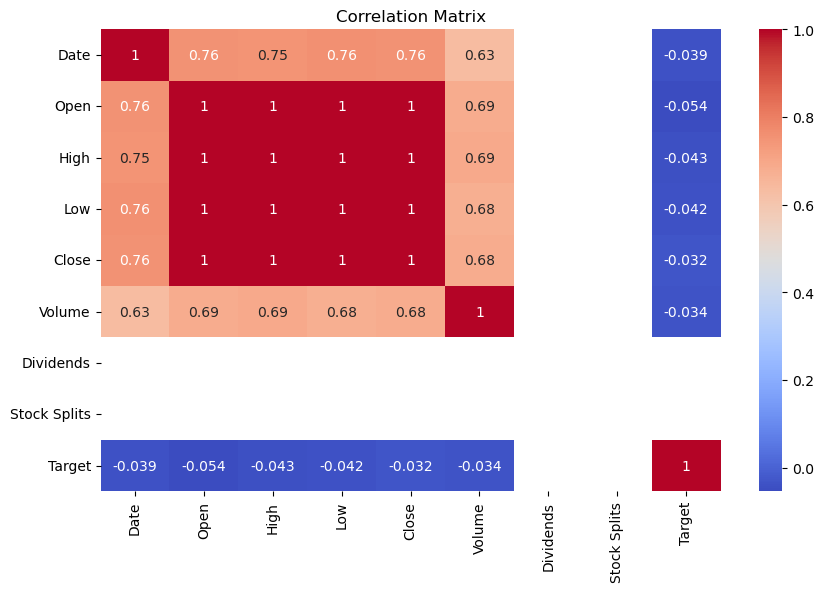

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


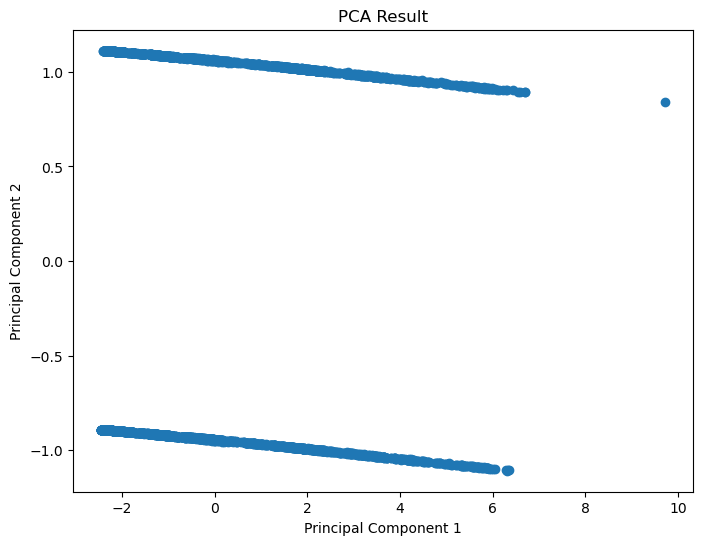

In [6]:
# Dimensionality Reduction using PCA

from sklearn.decomposition import PCA

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principal_components = pca.fit_transform(scaled_features)

# Converting to DataFrame for easier plotting or further analysis
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Optionally, you can plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()



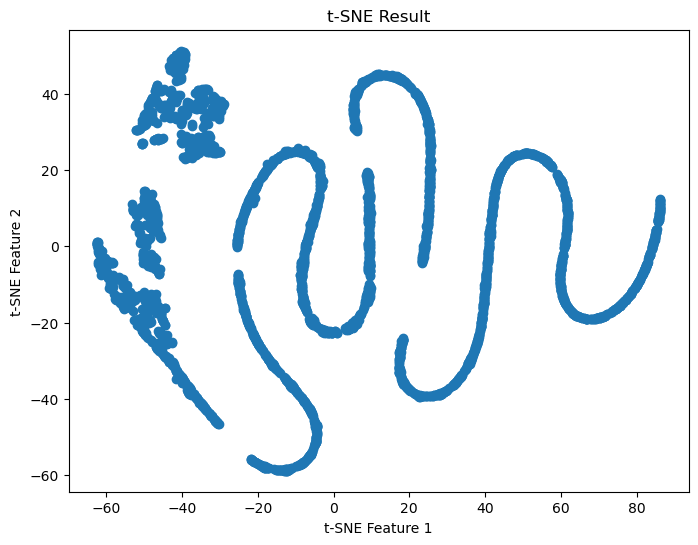

In [7]:
# Dimensionality using t-SNE

from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)  # Adjust parameters as needed
tsne_results = tsne.fit_transform(df)

# Converting to DataFrame
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Plotting the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Result')
plt.show()


In [8]:
# Fetch Bitcoin data

btc_ticker = yf.Ticker("BTC-USD")

In [9]:
# Reading or Saving Bitcoin Data to CSV

if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [10]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,0.0,0.0
2023-11-14 00:00:00+00:00,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,0.0,0.0
2023-11-15 00:00:00+00:00,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,0.0,0.0


In [11]:
# Dataframe Manipulation

btc.index = pd.to_datetime(btc.index)

In [12]:
# Dataframe Manipulation

del btc["Dividends"]
del btc["Stock Splits"]

In [13]:
# Renaming Columns

btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

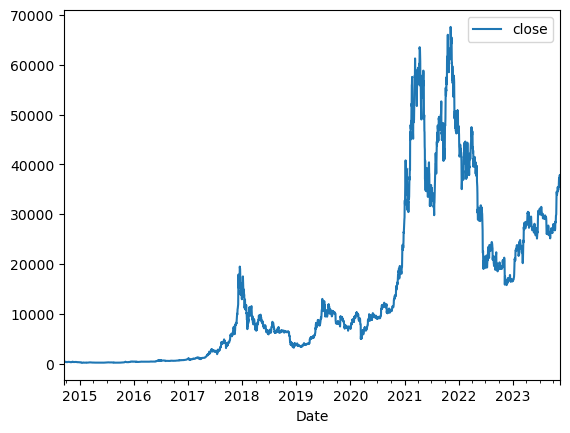

In [14]:
# Plotting Bitcoin Data

btc.plot.line(y="close", use_index=True)

In [15]:
# Reading Wikipedia Edits Data

wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [16]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-11-15,0.466667,-0.031475,0.150000
2023-11-16,0.466667,-0.031475,0.150000
2023-11-17,0.566667,-0.024696,0.161111
2023-11-18,0.633333,-0.057909,0.194444


In [17]:
# Merging Datasets and Timezone Adjustment

wiki.index = wiki.index.tz_localize('UTC')

merged_df = btc.merge(wiki, left_index=True, right_index=True)


In [18]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [19]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,0.966667,-0.016163,0.174359
2023-11-14 00:00:00+00:00,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,0.533333,-0.031522,0.166667
2023-11-15 00:00:00+00:00,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,0.466667,-0.031475,0.150000
2023-11-16 00:00:00+00:00,37879.980469,37934.625000,35545.472656,36154.769531,26007385366,0.466667,-0.031475,0.150000


In [20]:
# Preparing Data for Prediction

btc["tomorrow"] = btc["close"].shift(-1)

In [21]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,0.966667,-0.016163,0.174359,35537.640625
2023-11-14 00:00:00+00:00,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,0.533333,-0.031522,0.166667,37880.582031
2023-11-15 00:00:00+00:00,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,0.466667,-0.031475,0.150000,36154.769531
2023-11-16 00:00:00+00:00,37879.980469,37934.625000,35545.472656,36154.769531,26007385366,0.466667,-0.031475,0.150000,36390.472656


In [22]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [23]:
btc["target"].value_counts()

1    1770
0    1579
Name: target, dtype: int64

In [24]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,0.966667,-0.016163,0.174359,35537.640625,0
2023-11-14 00:00:00+00:00,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,0.533333,-0.031522,0.166667,37880.582031,1
2023-11-15 00:00:00+00:00,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,0.466667,-0.031475,0.150000,36154.769531,0
2023-11-16 00:00:00+00:00,37879.980469,37934.625000,35545.472656,36154.769531,26007385366,0.466667,-0.031475,0.150000,36390.472656,1


In [25]:
# Importing necessary libraries

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics

# Load the dataset
file_path = 'btc.csv'
btc_df = pd.read_csv(file_path)

# Add a target column: 1 if the close price increased compared to the previous day, else 0
btc_df['Target'] = (btc_df['Close'].shift(-1) > btc_df['Close']).astype(int)

# Drop the last row as it will have NaN in the target
btc_df = btc_df[:-1]

# Select features - excluding 'Date', 'Target', and any other non-relevant columns
X = btc_df.drop(['Date', 'Target','Open','Close','High','Low','Volume'], axis=1)
y = btc_df['Target']

# Define the model with increased complexity
model = RandomForestClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
f1_score = metrics.f1_score(y_test, predictions)
print(f"f1_score: {f1_score}")
recall_score = metrics.recall_score(y_test, predictions)
print(f"recall_score: {recall_score}")
precision_score = metrics.precision_score(y_test, predictions)
print(f"precision_score: {precision_score}")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(f"confusion_matrix: {confusion_matrix}")




Accuracy: 0.5522388059701493
f1_score: 0.7115384615384616
recall_score: 1.0
precision_score: 0.5522388059701493
confusion_matrix: [[  0 300]
 [  0 370]]


In [26]:
# Splitting the Data into Training and Validation Sets

from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Choosing the model and Setting Up Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)


In [28]:
# Hyperparameter Tuning Using the Validation Set

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(X_val, y_val)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Validation Set Accuracy: {validation_accuracy}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Validation Set Accuracy: 0.5522388059701493


In [29]:
from sklearn.model_selection import cross_val_score  

model = RandomForestClassifier(random_state=42)

# Assuming X and y are your features and target variable
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.52835821 0.52835821 0.52835821 0.52914798 0.52914798]
Mean accuracy: 0.5286741181982464
Standard deviation: 0.0003869082252170532


In [30]:
# Evaluating error with Backtesting

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [31]:
# Using Backtest Function

def backtest(data, model, predictors, start=1095, step=150)  :
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [32]:
# pip install xgboost


In [33]:
# Importing necessary libraries

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score, recall_score, precision_score, confusion_matrix

# Load the dataset
file_path = 'btc.csv'
btc_df = pd.read_csv(file_path)

# Add a target column: 1 if the close price increased compared to the previous day, else 0
btc_df['Target'] = (btc_df['Close'].shift(-1) > btc_df['Close']).astype(int)

# Drop the last row as it will have NaN in the target
btc_df = btc_df[:-1]

# Select features - excluding 'Date', 'Target', and any other non-relevant columns
X = btc_df.drop(['Date', 'Target'], axis=1)
y = btc_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
f1_score = metrics.f1_score(y_test, predictions)
print(f"f1_score: {f1_score}")
recall_score = metrics.recall_score(y_test, predictions)
print(f"recall_score: {recall_score}")
precision_score = metrics.precision_score(y_test, predictions)
print(f"precision_score: {precision_score}")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(f"confusion_matrix: {confusion_matrix}")


Accuracy: 0.5432835820895522
f1_score: 0.5864864864864865
recall_score: 0.5864864864864865
precision_score: 0.5864864864864865
confusion_matrix: [[147 153]
 [153 217]]


In [34]:
# Improving Precision with Trends

def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [35]:
btc, new_predictors = compute_rolling(btc.copy())

In [36]:
predictions

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [37]:
# Simple Moving Average (SMA) Indicator

def calculate_sma(data, window):
    return data['close'].rolling(window=window).mean()

# Example usage
btc['SMA_20'] = calculate_sma(btc, 20)  # 20-day SMA
btc['SMA_50'] = calculate_sma(btc, 50)  # 50-day SMA



In [38]:
# Display the Data Frame with SMAs

print(btc.head())


                                 open        high         low       close  \
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             volume  edit_count  sentiment  neg_sentiment  \
2014-09-17 00:00:00+00:00  21056800    5.033333  -0.232191       0.532718   
2014-09-18 00:00:00+00:00  34483200    5.066667  -0.232760       0.532718   
2014-09-19 00:00:00+00:00  37919700    5.200000  -0.235415       0.549385   
2014-09-20 00:00:00+00:00  36863600    5.200000  -0.233185       0.549385   
2014-09-21 00:00:00+00:00  26580100    5.233333  -0.204017       0.532718   

                             tomorrow  target  ...    edit_7   trend_7  \


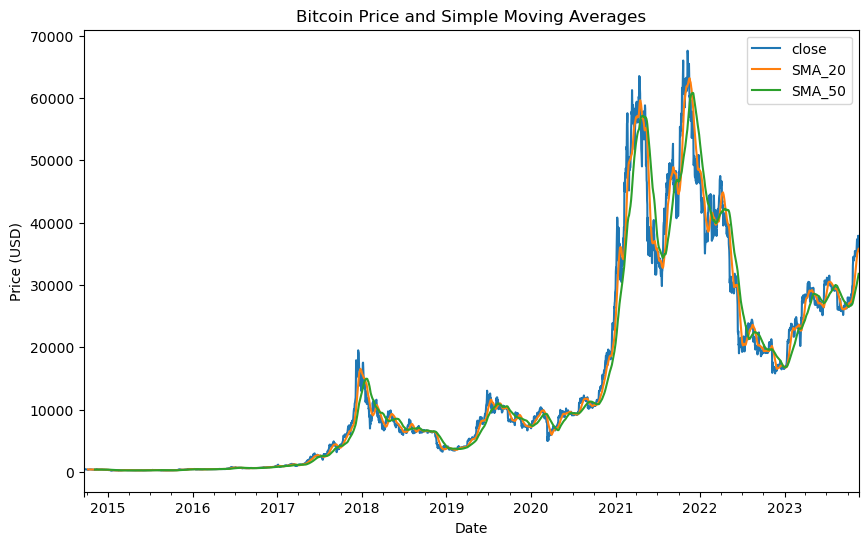

In [39]:
# Plotting the Data

import matplotlib.pyplot as plt

btc[['close', 'SMA_20', 'SMA_50']].plot(figsize=(10,6))
plt.title('Bitcoin Price and Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [40]:
#  Descriptive Statistics

print(btc[['SMA_20', 'SMA_50']].describe())


             SMA_20        SMA_50
count   3330.000000   3300.000000
mean   14212.364683  14192.446841
std    15923.237025  15810.957318
min      226.383199    232.261620
25%      908.212458    928.552158
50%     8186.204822   8295.492485
75%    22962.479199  22539.161309
max    63149.319727  60801.771016


In [41]:
# Tail of the Data Frame

print(btc.tail())


                                   open          high           low  \
2023-11-13 00:00:00+00:00  37070.304688  37405.117188  36399.605469   
2023-11-14 00:00:00+00:00  36491.789062  36753.351562  34948.500000   
2023-11-15 00:00:00+00:00  35548.113281  37964.894531  35383.781250   
2023-11-16 00:00:00+00:00  37879.980469  37934.625000  35545.472656   
2023-11-17 00:00:00+00:00  36164.824219  36632.976562  36112.046875   

                                  close       volume  edit_count  sentiment  \
2023-11-13 00:00:00+00:00  36502.355469  19057712790    0.966667  -0.016163   
2023-11-14 00:00:00+00:00  35537.640625  23857403554    0.533333  -0.031522   
2023-11-15 00:00:00+00:00  37880.582031  27365821679    0.466667  -0.031475   
2023-11-16 00:00:00+00:00  36154.769531  26007385366    0.466667  -0.031475   
2023-11-17 00:00:00+00:00  36390.472656  25662785536    0.566667  -0.024696   

                           neg_sentiment      tomorrow  target  ...    edit_7  \
2023-11-13 00:00:

In [42]:
# Real Time Data Analysis

import yfinance as yf

def fetch_realtime_price(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    btc_data = ticker.history(period="1d")
    return btc_data['Close'].iloc[-1]

# Fetch the latest Bitcoin price
latest_price = fetch_realtime_price("BTC-USD")
print("Latest Bitcoin Price: USD", latest_price)


Latest Bitcoin Price: USD 37820.02734375


In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [44]:
# List of cryptocurrencies for the portfolio
cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD']

# Fetch historical data
data = yf.download(cryptos, start='2020-01-01', end='2023-01-01')['Close']


[*********************100%%**********************]  5 of 5 completed


In [45]:
# Calculate daily returns
returns = data.pct_change().dropna()


In [46]:
# Mean daily returns and covariance
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


In [47]:
# Number of portfolios to simulate
num_portfolios = 10000

# The number of rows in the results array should be 3 (for return, stdev, and sharpe) plus the number of cryptos
num_rows = 3 + len(cryptos)

# Set up array to hold results
results = np.zeros((num_rows, num_portfolios))

for i in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(len(cryptos))
    weights /= np.sum(weights)
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    # Store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    # Store Sharpe Ratio (assuming risk-free rate is 0)
    results[2,i] = results[0,i] / results[1,i]
    # Store weights for each cryptocurrency
    for j in range(len(weights)):
        results[3+j,i] = weights[j]



In [48]:
# Convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe'] + cryptos)

# Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]


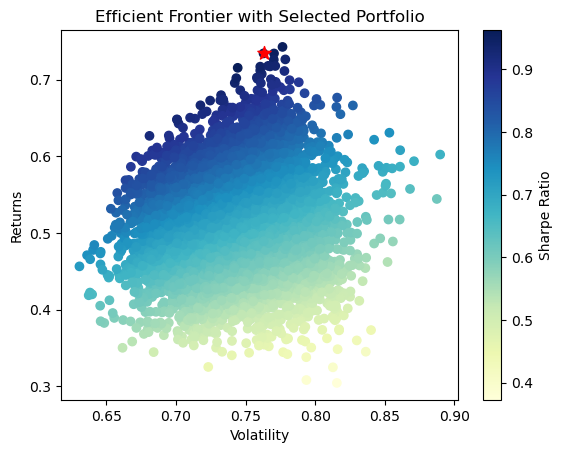

In [49]:
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='YlGnBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='red', marker='*', s=100)

# Red star for max Sharpe Ratio
plt.title('Efficient Frontier with Selected Portfolio')
plt.show()


In [50]:

# Define the Bitcoin ticker symbol
btc_ticker = "BTC-USD"

# Fetch historical data for Bitcoin
btc_data = yf.download(btc_ticker, period="1mo")  # Adjust the period as needed

# Extract the 'Close' column
btc_close_prices = btc_data['Close']

# Display the closing prices
print(btc_close_prices)


[*********************100%%**********************]  1 of 1 completed
Date
2023-10-29    34538.480469
2023-10-30    34502.363281
2023-10-31    34667.781250
2023-11-01    35437.253906
2023-11-02    34938.242188
2023-11-03    34732.324219
2023-11-04    35082.195312
2023-11-05    35049.355469
2023-11-06    35037.371094
2023-11-07    35443.562500
2023-11-08    35655.277344
2023-11-09    36693.125000
2023-11-10    37313.968750
2023-11-11    37138.050781
2023-11-12    37054.519531
2023-11-13    36502.355469
2023-11-14    35537.640625
2023-11-15    37880.582031
2023-11-16    36154.769531
2023-11-17    36596.683594
2023-11-18    36585.703125
2023-11-19    37386.546875
2023-11-20    37476.957031
2023-11-21    35813.812500
2023-11-22    37432.339844
2023-11-23    37289.621094
2023-11-24    37720.281250
2023-11-25    37796.792969
2023-11-26    37479.121094
2023-11-27    37254.167969
2023-11-28    37831.085938
2023-11-29    37820.027344
Name: Close, dtype: float64


In [51]:
latest_close_price = btc_close_prices[-1]
print(f"Latest closing price for Bitcoin: {latest_close_price}")


Latest closing price for Bitcoin: 37820.02734375


[*********************100%%**********************]  1 of 1 completed


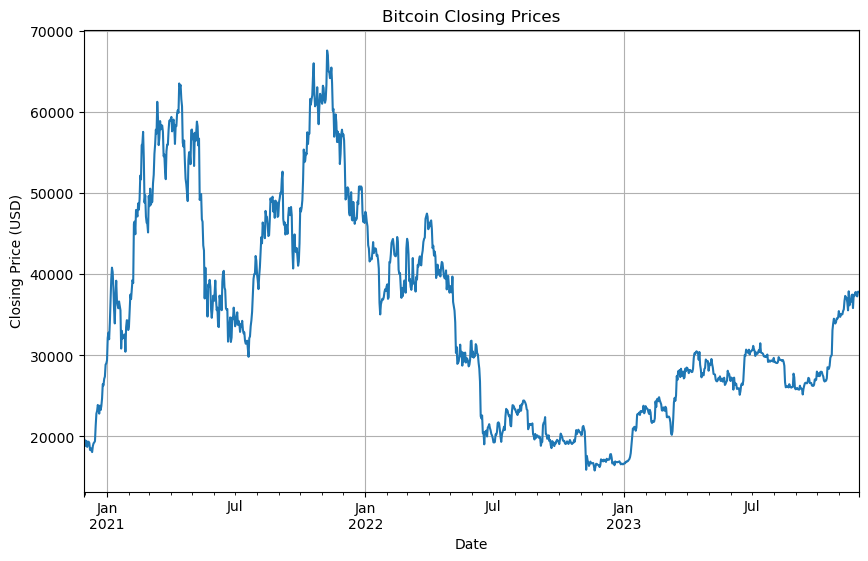

In [52]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the Bitcoin ticker symbol
btc_ticker = "BTC-USD"

# Fetch historical data for Bitcoin
btc_data = yf.download(btc_ticker, period="3y")  # Adjust the period as needed

# Extract the 'Close' column
btc_close_prices = btc_data['Close']

# Plotting the closing prices
plt.figure(figsize=(10, 6))
btc_close_prices.plot()
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


16:32:31 - cmdstanpy - INFO - Chain [1] start processing
16:32:31 - cmdstanpy - INFO - Chain [1] done processing


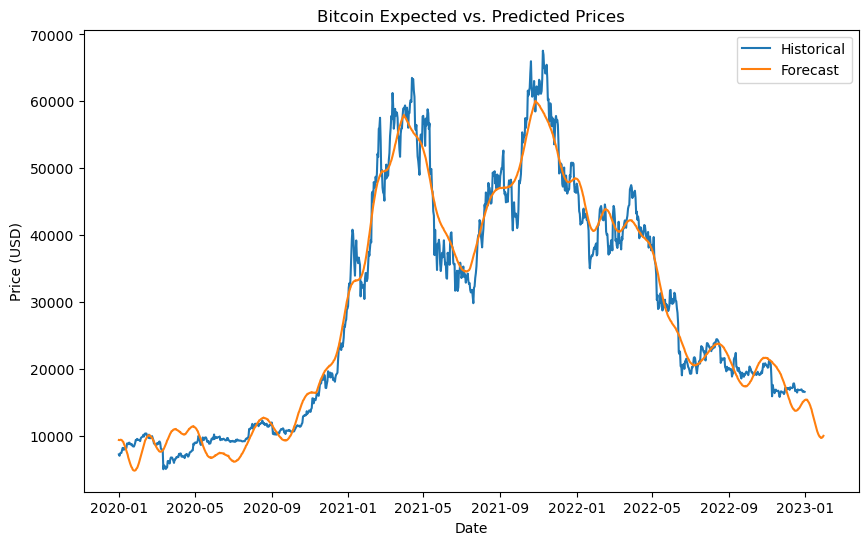

In [53]:
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical Bitcoin data
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2023-01-01')

# Prepare the dataframe
df = btc_data.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Create a dataframe to hold predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# Plot the historical and forecasted data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['ds'], df['y'], label='Historical')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
ax.set_title('Bitcoin Expected vs. Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
plt.show()


In [54]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [55]:
# Using AdaBoostClassifier for good Accuracy

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [56]:
# Assuming btc is your DataFrame with Bitcoin data
btc['target'] = (btc['close'].shift(-1) > btc['close']).astype(int)
features = btc[['open', 'high', 'low', 'close', 'volume']]  # Example features
target = btc['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [57]:
# Create AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [58]:
# Predictions
predictions = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))


Accuracy: 0.5164179104477612
              precision    recall  f1-score   support

           0       0.46      0.32      0.38       462
           1       0.54      0.69      0.60       543

    accuracy                           0.52      1005
   macro avg       0.50      0.50      0.49      1005
weighted avg       0.51      0.52      0.50      1005



In [59]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365,SMA_20,SMA_50
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00+00:00,37070.304688,37405.117188,36399.605469,36502.355469,19057712790,0.966667,-0.016163,0.174359,35537.640625,0,...,0.995238,0.571429,1.206642,0.764444,0.516667,1.418980,0.580365,0.482192,35322.253516,30965.599648
2023-11-14 00:00:00+00:00,36491.789062,36753.351562,34948.500000,35537.640625,23857403554,0.533333,-0.031522,0.166667,37880.582031,1,...,0.928571,0.428571,1.169001,0.760000,0.500000,1.378700,0.578904,0.479452,35373.994531,31150.382852
2023-11-15 00:00:00+00:00,35548.113281,37964.894531,35383.781250,37880.582031,27365821679,0.466667,-0.031475,0.150000,36154.769531,0,...,0.852381,0.428571,1.238391,0.754444,0.516667,1.466324,0.577352,0.479452,35560.191211,31383.649492
2023-11-16 00:00:00+00:00,37879.980469,37934.625000,35545.472656,36154.769531,26007385366,0.466667,-0.031475,0.150000,36390.472656,1,...,0.776190,0.285714,1.175807,0.749444,0.516667,1.396633,0.575799,0.479452,35672.439648,31579.690547
